<br>
<br>
 <center> <font size = "6"> Granger Causality
 </font></center>
 
 <br>
 
  <center> <font size = "5"> Naive Implementation
 </font></center>
 <br>
 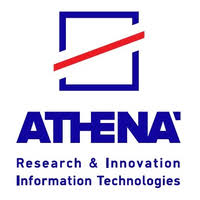
<br>
<br>

---

### Imports

In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br>

### Simple Example with stats library - two time series

In this exampe we tried to use the grangercausalitytests library from stats model and produce an initial example with Bivariate Granger Causality. Specifically we create a random time series (t1) and a scaled version of it (t2). Subsequently, we adjust the time series  by shifting t2 1 timestamp into the future in  order to 'create' a Granger Caused relationship of t1 -> t2 as also shown in the graph below. Finally, we execute a Granger Causality test for both:
- t1 -> t2
- t2 -> t1

using the grangercausalitytests. The Null hypothesis for grangercausalitytests is that the time series in the second column, does NOT Granger cause the time series in the first column. We reject the null hypothesis that x2 does not Granger cause x1 if the pvalues are below a desired size of the test. 

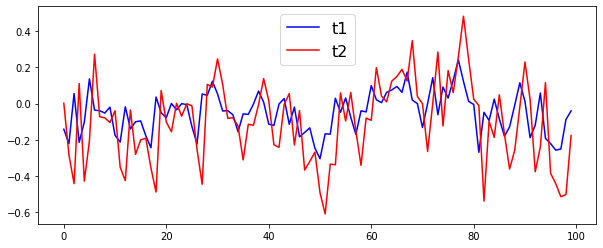

Test for t1 -> t2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=454599639219321308425520444080128.0000, p=0.0000  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=468805877944925108321017212698624.0000, p=0.0000  , df=1
likelihood ratio test: chi2=6992.6295, p=0.0000  , df=1
parameter F test:         F=454599639219321236367926406152192.0000, p=0.0000  , df_denom=96, df_num=1


Test for t2 -> t1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2237  , p=0.6373  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=0.2307  , p=0.6310  , df=1
likelihood ratio test: chi2=0.2305  , p=0.6312  , df=1
parameter F test:         F=0.2237  , p=0.6373  , df_denom=96, df_num=1


In [2]:
# Build the time series, just a simple AR(1)
# -----------------------------------------
t1 = [0.001*np.random.normal()]
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())
    
# Build the time series that is granger caused by t1, use the t1 scaled x10
t2 = [item*2  for item in t1]

# Adjust t1 and t2, shift t2 3 months into the future
# t1 -> t2
t1 = t1[1:]
t2 = t2[:-1]

# Plot time series
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')
plt.legend(['t1', 't2'], fontsize=16)
plt.show()

print('Test for t1 -> t2')
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2,t1))
ts_df.head()

gc_res = grangercausalitytests(ts_df, [1])

print('')
print('')
print('Test for t2 -> t1')
ts_df = pd.DataFrame(columns=['t1', 't2'], data=zip(t1,t2))
ts_df.head()

gc_res = grangercausalitytests(ts_df, [1])

<br>

### Naive Implementation of Bivariate Granger Causality for more time series

At this point we tried to use this implementation in order to identify Granger Causality relationships from a bigger set of time series. In order to test that our implementation works, we decided to produce a set of three different time series. Specifically, we created two time series t1 and t2 in a way that t1 -> t2 with a lag = 1 and a third (t3) which was entirely random. Using our implementation below we will try to check whether it will manage to capture the t1 -> t2 relationship. We will base our results on p value of the F test with an a=0.05.

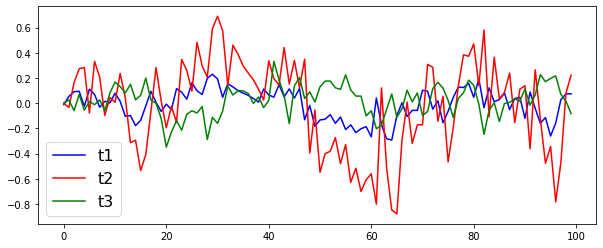

In [10]:
# Build the two granger caused time series
# ----------------------------------------

t1 = [0.001*np.random.normal()]
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())
    
# Build the time series that is granger caused by t1, use the t1 scaled x10
t2 = [item*3  for item in t1]

# Adjust t1 and t2, shift t2 5 months into the future
# t1 -> t2
t1 = t1[1:]
t2 = t2[:-1]

# Build the t3 (random one)
# -------------------------
t3 = [0.001*np.random.normal()]
for _ in range(99):
    t3.append(0.5*t3[-1] + 0.1*np.random.normal())
    
    
# Plot time series
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')
plt.plot(t3, color='g')
plt.legend(['t1', 't2', 't3','t4','t5'], fontsize=16)
plt.show()

In [15]:
ts_df = pd.DataFrame(columns=['t1', 't2'], data=zip(t1,t2))
gc_res = grangercausalitytests(ts_df, [1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.5300  , p=0.0072  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=7.7653  , p=0.0053  , df=1
likelihood ratio test: chi2=7.4758  , p=0.0063  , df=1
parameter F test:         F=7.5300  , p=0.0072  , df_denom=96, df_num=1


In [18]:
# Create the set with the time series data
time_series = [t1, t2, t3]

# Define the lag value
lag = 1

# Initialise the list with the results
results = []

In [21]:
for i in range(0,len(time_series)):
    for j in range(0,len(time_series)):
        if i!=j:
            print('t'+str(j+1)+'->'+'t'+str(i+1))
    
            X = time_series[i]
            Y = time_series[j]
            
            # Make the Granger Causality Test
            ts_df = pd.DataFrame(columns=['X', 'Y'], data=zip(X,Y))
            gc_res = grangercausalitytests(ts_df, [lag])
            p = gc_res[1][0]['params_ftest'][1]
            if p < 0.005:
                results.append('t'+str(j+1)+'->'+'t'+str(i+1))
            
print('')
print('The Granger Causalities found are:')
print(results)

t2->t1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.5300  , p=0.0072  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=7.7653  , p=0.0053  , df=1
likelihood ratio test: chi2=7.4758  , p=0.0063  , df=1
parameter F test:         F=7.5300  , p=0.0072  , df_denom=96, df_num=1
t3->t1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5505  , p=0.4599  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=0.5677  , p=0.4512  , df=1
likelihood ratio test: chi2=0.5661  , p=0.4518  , df=1
parameter F test:         F=0.5505  , p=0.4599  , df_denom=96, df_num=1
t1->t2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=52064309174574645280349156802560.0000, p=0.0000  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=53691318836280097597335510450176.0000, p=0.0000  , df=1
likelihood ratio test: chi2=6778.1027, p=0.0000  , df=1
parameter F test:         F=52064309174574618258751392579584.0000, p=0.0000  , df_denom=96, 

<br>

### Naive Implementation of Bivariate Granger Causality FMRI data

In [56]:
df = pd.read_csv ('fmri_timeseries.csv')

In [74]:
results = []

for i in range(0,len(df.columns)):
    for j in range(0,len(df.columns)):
        if i!=j:
            
            X = df.iloc[: , [i]][df.iloc[: , [i]].columns.values[0]].tolist()
            Y = df.iloc[: , [j]][df.iloc[: , [j]].columns.values[0]].tolist()
            
            # Make the Granger Causality Test
            ts_df = pd.DataFrame(columns=['X', 'Y'], data=zip(X,Y))
            gc_res = grangercausalitytests(ts_df, [lag])
            p = gc_res[1][0]['params_ftest'][1]
            if p < 0.0001:
                results.append(df.iloc[: , [j]].columns.values[0]+'->'+ df.iloc[: , [i]].columns.values[0])
            
print('')
print('The Granger Causalities found are:')
print(results)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9876  , p=0.0087  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=7.0728  , p=0.0078  , df=1
likelihood ratio test: chi2=6.9742  , p=0.0083  , df=1
parameter F test:         F=6.9876  , p=0.0087  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7208  , p=0.0549  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=3.7662  , p=0.0523  , df=1
likelihood ratio test: chi2=3.7380  , p=0.0532  , df=1
parameter F test:         F=3.7208  , p=0.0549  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2195  , p=0.2705  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.2344  , p=0.2665  , df=1
likelihood ratio test: chi2=1.2314  , p=0.2671  , df=1
parameter F test:         F=1.2195  , p=0.2705  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0052  , p=0.9428  

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0424  , p=0.8369  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0430  , p=0.8358  , df=1
likelihood ratio test: chi2=0.0430  , p=0.8358  , df=1
parameter F test:         F=0.0424  , p=0.8369  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4735  , p=0.4920  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.4792  , p=0.4888  , df=1
likelihood ratio test: chi2=0.4788  , p=0.4890  , df=1
parameter F test:         F=0.4735  , p=0.4920  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0131  , p=0.9091  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0132  , p=0.9084  , df=1
likelihood ratio test: chi2=0.0132  , p=0.9084  , df=1
parameter F test:         F=0.0131  , p=0.9091  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0025  , p=0.9602  ,

parameter F test:         F=0.0809  , p=0.7764  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4879  , p=0.2237  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.5060  , p=0.2197  , df=1
likelihood ratio test: chi2=1.5015  , p=0.2204  , df=1
parameter F test:         F=1.4879  , p=0.2237  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1321  , p=0.7166  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.1337  , p=0.7146  , df=1
likelihood ratio test: chi2=0.1337  , p=0.7146  , df=1
parameter F test:         F=0.1321  , p=0.7166  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0505  , p=0.8224  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0511  , p=0.8212  , df=1
likelihood ratio test: chi2=0.0511  , p=0.8212  , df=1
parameter F test:         F=0.0505  , p=0.8224  , df_denom=246, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7900  , p=0.3750  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.7997  , p=0.3712  , df=1
likelihood ratio test: chi2=0.7984  , p=0.3716  , df=1
parameter F test:         F=0.7900  , p=0.3750  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2636  , p=0.6081  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.2668  , p=0.6055  , df=1
likelihood ratio test: chi2=0.2667  , p=0.6056  , df=1
parameter F test:         F=0.2636  , p=0.6081  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1894  , p=0.6638  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.1917  , p=0.6615  , df=1
likelihood ratio test: chi2=0.1917  , p=0.6615  , df=1
parameter F test:         F=0.1894  , p=0.6638  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.0085 , p=0.0018  ,

likelihood ratio test: chi2=4.1106  , p=0.0426  , df=1
parameter F test:         F=4.0948  , p=0.0441  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8257  , p=0.3644  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.8357  , p=0.3606  , df=1
likelihood ratio test: chi2=0.8343  , p=0.3610  , df=1
parameter F test:         F=0.8257  , p=0.3644  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9409  , p=0.0876  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=2.9768  , p=0.0845  , df=1
likelihood ratio test: chi2=2.9592  , p=0.0854  , df=1
parameter F test:         F=2.9409  , p=0.0876  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7254  , p=0.3952  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.7343  , p=0.3915  , df=1
likelihood ratio test: chi2=0.7332  , p=0.3919  , df=1
parameter F test:         F=0.7254  , p

ssr based F test:         F=9.8474  , p=0.0019  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=9.9675  , p=0.0016  , df=1
likelihood ratio test: chi2=9.7732  , p=0.0018  , df=1
parameter F test:         F=9.8474  , p=0.0019  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8354 , p=0.0007  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=11.9797 , p=0.0005  , df=1
likelihood ratio test: chi2=11.7005 , p=0.0006  , df=1
parameter F test:         F=11.8354 , p=0.0007  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=37.4042 , p=0.0000  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=37.8604 , p=0.0000  , df=1
likelihood ratio test: chi2=35.2441 , p=0.0000  , df=1
parameter F test:         F=37.4042 , p=0.0000  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.9182 , p=0.0000  , df_denom=246, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.6094  , p=0.4350  , df=1
likelihood ratio test: chi2=0.6087  , p=0.4353  , df=1
parameter F test:         F=0.6021  , p=0.4385  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0221  , p=0.8820  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0223  , p=0.8812  , df=1
likelihood ratio test: chi2=0.0223  , p=0.8812  , df=1
parameter F test:         F=0.0221  , p=0.8820  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4569  , p=0.0642  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=3.4990  , p=0.0614  , df=1
likelihood ratio test: chi2=3.4747  , p=0.0623  , df=1
parameter F test:         F=3.4569  , p=0.0642  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9622  , p=0.3276  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.9739  , p=0.3237  , df=1
likelihood ratio test: chi2=0.9720  , p

likelihood ratio test: chi2=0.9078  , p=0.3407  , df=1
parameter F test:         F=0.8985  , p=0.3441  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7560  , p=0.1863  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.7774  , p=0.1825  , df=1
likelihood ratio test: chi2=1.7711  , p=0.1832  , df=1
parameter F test:         F=1.7560  , p=0.1863  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6176  , p=0.0186  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=5.6861  , p=0.0171  , df=1
likelihood ratio test: chi2=5.6221  , p=0.0177  , df=1
parameter F test:         F=5.6176  , p=0.0186  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5590  , p=0.1110  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=2.5902  , p=0.1075  , df=1
likelihood ratio test: chi2=2.5768  , p=0.1084  , df=1
parameter F test:         F=2.5590  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6419  , p=0.1054  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=2.6741  , p=0.1020  , df=1
likelihood ratio test: chi2=2.6598  , p=0.1029  , df=1
parameter F test:         F=2.6419  , p=0.1054  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7993  , p=0.0056  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=7.8944  , p=0.0050  , df=1
likelihood ratio test: chi2=7.7719  , p=0.0053  , df=1
parameter F test:         F=7.7993  , p=0.0056  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4577  , p=0.4993  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.4633  , p=0.4961  , df=1
likelihood ratio test: chi2=0.4628  , p=0.4963  , df=1
parameter F test:         F=0.4577  , p=0.4993  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6827  , p=0.4095  ,

ssr based chi2 test:   chi2=1.2262  , p=0.2681  , df=1
likelihood ratio test: chi2=1.2232  , p=0.2687  , df=1
parameter F test:         F=1.2114  , p=0.2721  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7848  , p=0.0529  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=3.8310  , p=0.0503  , df=1
likelihood ratio test: chi2=3.8018  , p=0.0512  , df=1
parameter F test:         F=3.7848  , p=0.0529  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8021  , p=0.0097  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=6.8850  , p=0.0087  , df=1
likelihood ratio test: chi2=6.7916  , p=0.0092  , df=1
parameter F test:         F=6.8021  , p=0.0097  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6998  , p=0.1935  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.7205  , p=0.1896  , df=1
likelihood ratio test: chi2=1.7146  , p

parameter F test:         F=1.6234  , p=0.2038  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7273  , p=0.0175  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=5.7972  , p=0.0161  , df=1
likelihood ratio test: chi2=5.7307  , p=0.0167  , df=1
parameter F test:         F=5.7273  , p=0.0175  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1102  , p=0.7402  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.1115  , p=0.7384  , df=1
likelihood ratio test: chi2=0.1115  , p=0.7384  , df=1
parameter F test:         F=0.1102  , p=0.7402  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9735  , p=0.0473  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=4.0220  , p=0.0449  , df=1
likelihood ratio test: chi2=3.9898  , p=0.0458  , df=1
parameter F test:         F=3.9735  , p=0.0473  , df_denom=246, df_num=1

Granger Causality
nu

ssr based F test:         F=9.2697  , p=0.0026  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=9.3827  , p=0.0022  , df=1
likelihood ratio test: chi2=9.2103  , p=0.0024  , df=1
parameter F test:         F=9.2697  , p=0.0026  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0109  , p=0.9170  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0110  , p=0.9164  , df=1
likelihood ratio test: chi2=0.0110  , p=0.9164  , df=1
parameter F test:         F=0.0109  , p=0.9170  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5561  , p=0.4565  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.5629  , p=0.4531  , df=1
likelihood ratio test: chi2=0.5623  , p=0.4533  , df=1
parameter F test:         F=0.5561  , p=0.4565  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3452  , p=0.1270  , df_denom=246, df_num=1
ssr based chi2 test: 

ssr based F test:         F=4.8003  , p=0.0294  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=4.8589  , p=0.0275  , df=1
likelihood ratio test: chi2=4.8121  , p=0.0283  , df=1
parameter F test:         F=4.8003  , p=0.0294  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5182  , p=0.4723  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.5245  , p=0.4689  , df=1
likelihood ratio test: chi2=0.5239  , p=0.4692  , df=1
parameter F test:         F=0.5182  , p=0.4723  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8465  , p=0.0928  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=2.8812  , p=0.0896  , df=1
likelihood ratio test: chi2=2.8647  , p=0.0905  , df=1
parameter F test:         F=2.8465  , p=0.0928  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3635  , p=0.0123  , df_denom=246, df_num=1
ssr based chi2 test: 

parameter F test:         F=10.5781 , p=0.0013  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9231  , p=0.3376  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.9344  , p=0.3337  , df=1
likelihood ratio test: chi2=0.9327  , p=0.3342  , df=1
parameter F test:         F=0.9231  , p=0.3376  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3555  , p=0.2454  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.3721  , p=0.2415  , df=1
likelihood ratio test: chi2=1.3683  , p=0.2421  , df=1
parameter F test:         F=1.3555  , p=0.2454  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5055  , p=0.1147  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=2.5361  , p=0.1113  , df=1
likelihood ratio test: chi2=2.5232  , p=0.1122  , df=1
parameter F test:         F=2.5055  , p=0.1147  , df_denom=246, df_num=1

Granger Causality
nu

ssr based F test:         F=14.1947 , p=0.0002  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=14.3678 , p=0.0002  , df=1
likelihood ratio test: chi2=13.9685 , p=0.0002  , df=1
parameter F test:         F=14.1947 , p=0.0002  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1546  , p=0.6945  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.1565  , p=0.6924  , df=1
likelihood ratio test: chi2=0.1564  , p=0.6925  , df=1
parameter F test:         F=0.1546  , p=0.6945  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9976  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9976  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9976  , df=1
parameter F test:         F=0.0000  , p=0.9976  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0586  , p=0.8089  , df_denom=246, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.9265  , p=0.3367  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.9378  , p=0.3328  , df=1
likelihood ratio test: chi2=0.9360  , p=0.3333  , df=1
parameter F test:         F=0.9265  , p=0.3367  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5286  , p=0.4679  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.5350  , p=0.4645  , df=1
likelihood ratio test: chi2=0.5344  , p=0.4647  , df=1
parameter F test:         F=0.5286  , p=0.4679  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4591  , p=0.2282  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.4769  , p=0.2243  , df=1
likelihood ratio test: chi2=1.4725  , p=0.2249  , df=1
parameter F test:         F=1.4591  , p=0.2282  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9715  , p=0.0474  , df_denom=246, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7291  , p=0.0174  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=5.7990  , p=0.0160  , df=1
likelihood ratio test: chi2=5.7325  , p=0.0167  , df=1
parameter F test:         F=5.7291  , p=0.0174  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3350  , p=0.0690  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=3.3757  , p=0.0662  , df=1
likelihood ratio test: chi2=3.3530  , p=0.0671  , df=1
parameter F test:         F=3.3350  , p=0.0690  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7041  , p=0.0177  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=5.7737  , p=0.0163  , df=1
likelihood ratio test: chi2=5.7078  , p=0.0169  , df=1
parameter F test:         F=5.7041  , p=0.0177  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.6948 , p=0.0000  ,


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0181  , p=0.8932  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0183  , p=0.8924  , df=1
likelihood ratio test: chi2=0.0183  , p=0.8924  , df=1
parameter F test:         F=0.0181  , p=0.8932  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1638  , p=0.1426  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=2.1902  , p=0.1389  , df=1
likelihood ratio test: chi2=2.1806  , p=0.1398  , df=1
parameter F test:         F=2.1638  , p=0.1426  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5848  , p=0.0189  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=5.6529  , p=0.0174  , df=1
likelihood ratio test: chi2=5.5897  , p=0.0181  , df=1
parameter F test:         F=5.5848  , p=0.0189  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8250  , p=0.1780  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.9757 , p=0.0001  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=15.1584 , p=0.0001  , df=1
likelihood ratio test: chi2=14.7149 , p=0.0001  , df=1
parameter F test:         F=14.9757 , p=0.0001  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.2178 , p=0.0006  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=12.3668 , p=0.0004  , df=1
likelihood ratio test: chi2=12.0695 , p=0.0005  , df=1
parameter F test:         F=12.2178 , p=0.0006  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0351  , p=0.8515  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0355  , p=0.8505  , df=1
likelihood ratio test: chi2=0.0355  , p=0.8505  , df=1
parameter F test:         F=0.0351  , p=0.8515  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2265  , p=0.2692  

parameter F test:         F=0.0050  , p=0.9438  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4276  , p=0.2333  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.4450  , p=0.2293  , df=1
likelihood ratio test: chi2=1.4409  , p=0.2300  , df=1
parameter F test:         F=1.4276  , p=0.2333  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9882  , p=0.3212  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.0002  , p=0.3173  , df=1
likelihood ratio test: chi2=0.9982  , p=0.3177  , df=1
parameter F test:         F=0.9882  , p=0.3212  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5552  , p=0.4569  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.5619  , p=0.4535  , df=1
likelihood ratio test: chi2=0.5613  , p=0.4537  , df=1
parameter F test:         F=0.5552  , p=0.4569  , df_denom=246, df_num=1

Granger Causality
nu

ssr based F test:         F=7.0919  , p=0.0083  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=7.1783  , p=0.0074  , df=1
likelihood ratio test: chi2=7.0768  , p=0.0078  , df=1
parameter F test:         F=7.0919  , p=0.0083  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2146  , p=0.0411  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=4.2660  , p=0.0389  , df=1
likelihood ratio test: chi2=4.2299  , p=0.0397  , df=1
parameter F test:         F=4.2146  , p=0.0411  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0204  , p=0.8866  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0206  , p=0.8858  , df=1
likelihood ratio test: chi2=0.0206  , p=0.8858  , df=1
parameter F test:         F=0.0204  , p=0.8866  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1844  , p=0.6680  , df_denom=246, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1180  , p=0.0246  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=5.1804  , p=0.0228  , df=1
likelihood ratio test: chi2=5.1272  , p=0.0236  , df=1
parameter F test:         F=5.1180  , p=0.0246  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2731  , p=0.2603  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.2886  , p=0.2563  , df=1
likelihood ratio test: chi2=1.2853  , p=0.2569  , df=1
parameter F test:         F=1.2731  , p=0.2603  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4908  , p=0.1158  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=2.5212  , p=0.1123  , df=1
likelihood ratio test: chi2=2.5085  , p=0.1132  , df=1
parameter F test:         F=2.4908  , p=0.1158  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0450  , p=0.0454  ,

parameter F test:         F=0.0447  , p=0.8327  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1092  , p=0.1477  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=2.1349  , p=0.1440  , df=1
likelihood ratio test: chi2=2.1258  , p=0.1448  , df=1
parameter F test:         F=2.1092  , p=0.1477  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2348  , p=0.0230  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=5.2986  , p=0.0213  , df=1
likelihood ratio test: chi2=5.2430  , p=0.0220  , df=1
parameter F test:         F=5.2348  , p=0.0230  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0073  , p=0.9321  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0074  , p=0.9316  , df=1
likelihood ratio test: chi2=0.0074  , p=0.9316  , df=1
parameter F test:         F=0.0073  , p=0.9321  , df_denom=246, df_num=1

Granger Causality
nu


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4194  , p=0.0656  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=3.4611  , p=0.0628  , df=1
likelihood ratio test: chi2=3.4373  , p=0.0637  , df=1
parameter F test:         F=3.4194  , p=0.0656  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0569  , p=0.8117  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0576  , p=0.8104  , df=1
likelihood ratio test: chi2=0.0576  , p=0.8104  , df=1
parameter F test:         F=0.0569  , p=0.8117  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0025  , p=0.9598  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0026  , p=0.9595  , df=1
likelihood ratio test: chi2=0.0026  , p=0.9595  , df=1
parameter F test:         F=0.0025  , p=0.9598  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5851  , p=0.4451  

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.6465 , p=0.0013  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=10.7764 , p=0.0010  , df=1
likelihood ratio test: chi2=10.5497 , p=0.0012  , df=1
parameter F test:         F=10.6465 , p=0.0013  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2169  , p=0.0232  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=5.2805  , p=0.0216  , df=1
likelihood ratio test: chi2=5.2253  , p=0.0223  , df=1
parameter F test:         F=5.2169  , p=0.0232  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.5521  , p=0.0022  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=9.6686  , p=0.0019  , df=1
likelihood ratio test: chi2=9.4856  , p=0.0021  , df=1
parameter F test:         F=9.5521  , p=0.0022  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2438  , p=0.2658  ,

parameter F test:         F=9.8914  , p=0.0019  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9857  , p=0.0853  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=3.0221  , p=0.0821  , df=1
likelihood ratio test: chi2=3.0039  , p=0.0831  , df=1
parameter F test:         F=2.9857  , p=0.0853  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.7102  , p=0.0021  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=9.8286  , p=0.0017  , df=1
likelihood ratio test: chi2=9.6396  , p=0.0019  , df=1
parameter F test:         F=9.7102  , p=0.0021  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6385  , p=0.2017  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.6585  , p=0.1978  , df=1
likelihood ratio test: chi2=1.6530  , p=0.1986  , df=1
parameter F test:         F=1.6385  , p=0.2017  , df_denom=246, df_num=1

Granger Causality
nu

parameter F test:         F=3.1274  , p=0.0782  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9966  , p=0.3191  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.0088  , p=0.3152  , df=1
likelihood ratio test: chi2=1.0067  , p=0.3157  , df=1
parameter F test:         F=0.9966  , p=0.3191  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2433  , p=0.1355  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=2.2707  , p=0.1318  , df=1
likelihood ratio test: chi2=2.2604  , p=0.1327  , df=1
parameter F test:         F=2.2433  , p=0.1355  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1861  , p=0.2772  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.2006  , p=0.2732  , df=1
likelihood ratio test: chi2=1.1977  , p=0.2738  , df=1
parameter F test:         F=1.1861  , p=0.2772  , df_denom=246, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=0.1662  , p=0.6835  , df=1
likelihood ratio test: chi2=0.1661  , p=0.6836  , df=1
parameter F test:         F=0.1642  , p=0.6857  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2209  , p=0.6388  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.2236  , p=0.6363  , df=1
likelihood ratio test: chi2=0.2235  , p=0.6364  , df=1
parameter F test:         F=0.2209  , p=0.6388  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1359  , p=0.7127  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.1376  , p=0.7107  , df=1
likelihood ratio test: chi2=0.1375  , p=0.7108  , df=1
parameter F test:         F=0.1359  , p=0.7127  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2751  , p=0.2599  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.2907  , p=0.2559  , df=1
likelihood ratio test: chi2=1.2874  , p

In [75]:
results

['LAng->LCau',
 'LMTG->LCau',
 'RCau->LThal',
 'RAntPHG->LThal',
 'RAmy->LThal',
 'LMTG->LSupraM',
 'RAntPHG->LPostPHG',
 'LParaCing->APHG',
 'RParaCing->APHG',
 'RCau->LParaCing',
 'LMTG->LPCC',
 'LPrec->LPCC',
 'RParaCing->LPCC',
 'LAng->RPut',
 'LSupraM->RPut',
 'LMTG->RPut',
 'RCau->RThal',
 'RAntPHG->RThal',
 'RAmy->RThal',
 'RParaCing->RAng',
 'LPostPHG->RHip',
 'RMTG->RHip',
 'LThal->RAntPHG',
 'LPostPHG->RAntPHG',
 'LPostPHG->RAmy',
 'LMTG->RPCC']

In [ ]:
### Results from java implementation

In [ ]:
>>"LAng"->"LCau"
>>"LMTG"->"LCau"
>>"RCau"->"LThal"
>>"RAntPHG"->"LThal"
>>"RAmy"->"LThal"
>>"LMTG"->"LSupraM"
>>"RAntPHG"->"LPostPHG"
>>"LParaCing"->"APHG"
>>"RParaCing"->"APHG"
>>"RCau"->"LParaCing"
>>"LMTG"->"LPCC"
>>"LPrec"->"LPCC"
>>"RParaCing"->"LPCC"
>>"LAng"->"RPut"
>>"LSupraM"->"RPut"
>>"LMTG"->"RPut"
>>"RCau"->"RThal"
>>"RAntPHG"->"RThal"
>>"RAmy"->"RThal"
>>"RParaCing"->"RAng"
>>"LPostPHG"->"RHip"
>>"RMTG"->"RHip"
>>"LThal"->"RAntPHG"
>>"LPostPHG"->"RAntPHG"
>>"LPostPHG"->"RAmy"
>>"LMTG"->"RPCC"